In [6]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math 

In [7]:
def middle(box):
    """_summary_

    Args:
        box (array): box

    Returns:
        int: middle of the box
    """
    return [box[0]+(box[2]//2),box[1]+(box[3]//2)]

######################################################################################################

def decomp_row(row,size):
    """ decomposition of a row for the wavelet transform

    Args:
        row (array): row
        size (int): biggest power of 2 that contain the frame

    Returns:
        array: row decomposed
    """
    row=row/math.sqrt(2)
    while size>1:
        size=size//2
        for i in range(size):
            A=row[2*i]
            B=row[2*i+1]
            row[i],row[size+i]=(A+B)/math.sqrt(2),(A-B)/math.sqrt(2)
    return row
                       
######################################################################################################

def decomp_2D(img,size):
    """ decomp all the rows of a 2D array
    Args:
        img (array): 2D frame
        size (int): biggest power of 2 that contain the frame

    Returns:
        array: img decomposed
    """
    for i in range(size):
        img[i,:]=decomp_row(img[i,:],i)
    return img
        
######################################################################################################

def decomp_RGB(img,size):
    """ decomp of a RGB array

    Args:
        img (array): RGB array
        size (int): biggest power of 2 that contain the frame

    Returns:
        array: img decomposed
    """
    for i in range(3):
        img[:,:,i]=np.transpose(decomp_2D(img[:,:,i],size))
        img[:,:,i]=np.transpose(decomp_2D(img[:,:,i],size))
    return img

######################################################################################################

def Wavelet(img):
    """ wavelet Haar transform of a RGB frame

    Args:
        img (array): RGB frame

    Returns:
        array: wavelet transform
    """
    img= cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    img=img.astype(np.float)
    
    n=min(img.shape[0],img.shape[1])
    
    size = 1
    while size < n: size *=2
    size//=2
    
    middle_x=img.shape[0]//2
    middle_y=img.shape[1]//2
    
    resized=img[middle_x-(size//2):middle_x+(size//2),middle_y-(size//2):middle_y+(size//2),:]
    #resized = cv2.resize(img,(64,64))
    
    res=decomp_RGB(resized,size)
    
    return res


C:\Users\lc100\AppData\Local\Temp\ipykernel_12688\3019806044.py:77: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img=img.astype(np.float)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



very blurry
(32, 32, 3)
(32, 32, 3)


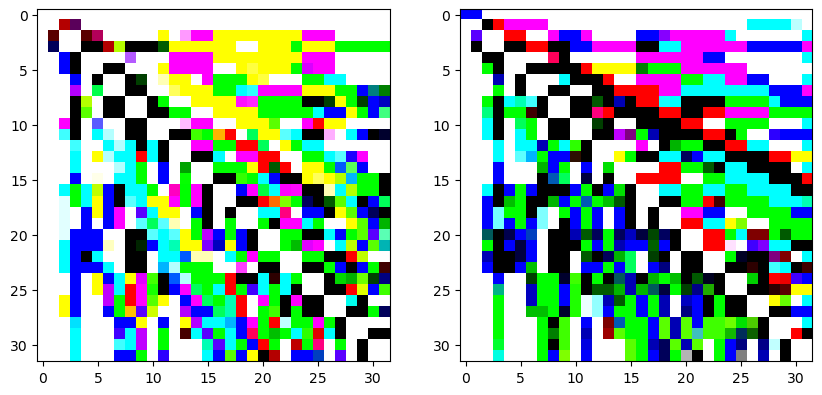

29.499999999999996
29.499999999999996
29.999999999999993
28.999999999999996
---------------------------------------------------------------------------------------------
[[[29.5 61.  70. ]
  [30.  61.  70. ]]

 [[29.5 61.5 69.5]
  [29.  64.  70. ]]] 
------
 [[[  0.    0.  127.5]
  [  0.    0.  127. ]]

 [[ 15.    6.  127.5]
  [ 15.    6.  127.5]]]

------
 107.83333333333333
---------------------------------------------------------------------------------------------


In [8]:
def compare(file1,file2):
    fig = plt.figure(figsize=(10, 7))

    template_test = cv2.imread('template/templateRGB_Black.png')
    template_test = cv2.imread(file1)
    waveletT=Wavelet(template_test)
    print(waveletT.shape)
    fig.add_subplot(1,2,1)
    plt.imshow(waveletT)


    template_test = cv2.imread('template/templateGoal.png')
    template_test = cv2.imread(file2)
    wavelet=Wavelet(template_test)
    print(wavelet.shape)
    fig.add_subplot(1,2,2)
    plt.imshow(wavelet)

    plt.show()
    
    print(waveletT[0,0,0])
    print(waveletT[1,0,0])
    print(waveletT[0,1,0])
    print(waveletT[1,1,0])
    
    print("---------------------------------------------------------------------------------------------")

    print(waveletT[:2,:2,:],"\n------\n",wavelet[:2,:2,:])
    print("\n------\n",np.sum(cv2.absdiff(waveletT[:2,:2,:2],wavelet[:2,:2,:2]))/3)
    print("---------------------------------------------------------------------------------------------")

print("\nvery blurry")
compare('template/templateRGB_both.png','template/object2.jpg')

In [9]:
"""
import numpy as np
import matplotlib.pyplot as plt

# Signal
T = 1.

def signal(t,f=1): return np.sin(2. *f* np.pi * t / T)

# Echantillonnage
D = 5. # Duree d'observation
fe = 10. # Frequence d'echantillonnage
N = int(D * fe) + 1 # Nombre de points enregistres

tp = np.linspace(0., D, 1000) # Grille plus fine pour tracer l'allure du signal parfait
tp2 = np.linspace(D, D*2, 1000) # Grille plus fine pour tracer l'allure du signal parfait

y=np.concatenate((signal(tp),signal(tp2,f=2)))
t=np.concatenate((tp,tp2))

# Trace du signal

fig = plt.figure(figsize=(12, 3))

y=np.concatenate((signal(tp),signal(tp2,f=2)))
t=np.concatenate((tp,tp2))


fig.add_subplot(1,2,1)
plt.plot(t, y, 'b')
plt.grid()
plt.xlabel("Temps $t$")
plt.ylabel("Amplitude $x(t)$")


y=np.concatenate((signal(tp,f=2),signal(tp2,f=1)))
fig.add_subplot(1,2,2)
plt.plot(t, y, 'b')
plt.grid()
plt.xlabel("Temps $t$")
plt.ylabel("Amplitude $x(t)$")

plt.show()
"""


'\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# Signal\nT = 1.\n\ndef signal(t,f=1): return np.sin(2. *f* np.pi * t / T)\n\n# Echantillonnage\nD = 5. # Duree d\'observation\nfe = 10. # Frequence d\'echantillonnage\nN = int(D * fe) + 1 # Nombre de points enregistres\n\ntp = np.linspace(0., D, 1000) # Grille plus fine pour tracer l\'allure du signal parfait\ntp2 = np.linspace(D, D*2, 1000) # Grille plus fine pour tracer l\'allure du signal parfait\n\ny=np.concatenate((signal(tp),signal(tp2,f=2)))\nt=np.concatenate((tp,tp2))\n\n# Trace du signal\n\nfig = plt.figure(figsize=(12, 3))\n\ny=np.concatenate((signal(tp),signal(tp2,f=2)))\nt=np.concatenate((tp,tp2))\n\n\nfig.add_subplot(1,2,1)\nplt.plot(t, y, \'b\')\nplt.grid()\nplt.xlabel("Temps $t$")\nplt.ylabel("Amplitude $x(t)$")\n\n\ny=np.concatenate((signal(tp,f=2),signal(tp2,f=1)))\nfig.add_subplot(1,2,2)\nplt.plot(t, y, \'b\')\nplt.grid()\nplt.xlabel("Temps $t$")\nplt.ylabel("Amplitude $x(t)$")\n\nplt.show()\n'

In [10]:
"""
import numpy as np
import matplotlib.pyplot as plt

# Signal
T = 1.

def signalMorlet(t,f=1): return np.sin(2. *f* np.pi * t / T)*math.e**(-(t**2)/2)

# Echantillonnage
D = 10. # Duree d'observation

tp = np.linspace(-D/2, D/2, 1000) # Grille plus fine pour tracer l'allure du signal parfait

y=signalMorlet(t,f=1)

# Trace du signal

fig = plt.figure(figsize=(12, 3))


fig.add_subplot(1,2,1)
plt.plot(tp, signalMorlet(tp), 'b')
plt.grid()
plt.xlabel("Temps $t$")
plt.ylabel("Amplitude $x(t)$")


fig.add_subplot(1,2,2)

t=[ 0. , 0.5]
y=[ 1. , 1.]
plt.plot(t, y, 'b')
t=[ 0.5 , 1.]
y=[ -1. , -1.]
plt.plot(t, y, 'b')
t=[ 1. , 2.]
y=[ 0. , 0.]
plt.plot(t, y, 'b')
t=[ -1. , 0.]
y=[ 0., 0.]
plt.plot(t, y, 'b')
t=[ 0. , 0.]
y=[ 0. , 1.]
plt.plot(t, y, 'b')
t=[ 1. , 1.]
y=[ 0. , -1.]
plt.plot(t, y, 'b')
t=[ 0.5 , 0.5]
y=[ 1. , -1.]
plt.plot(t, y, 'b')
plt.grid()
plt.xlabel("Temps $t$")
plt.ylabel("Amplitude $x(t)$")

plt.show()
"""

'\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# Signal\nT = 1.\n\ndef signalMorlet(t,f=1): return np.sin(2. *f* np.pi * t / T)*math.e**(-(t**2)/2)\n\n# Echantillonnage\nD = 10. # Duree d\'observation\n\ntp = np.linspace(-D/2, D/2, 1000) # Grille plus fine pour tracer l\'allure du signal parfait\n\ny=signalMorlet(t,f=1)\n\n# Trace du signal\n\nfig = plt.figure(figsize=(12, 3))\n\n\nfig.add_subplot(1,2,1)\nplt.plot(tp, signalMorlet(tp), \'b\')\nplt.grid()\nplt.xlabel("Temps $t$")\nplt.ylabel("Amplitude $x(t)$")\n\n\nfig.add_subplot(1,2,2)\n\nt=[ 0. , 0.5]\ny=[ 1. , 1.]\nplt.plot(t, y, \'b\')\nt=[ 0.5 , 1.]\ny=[ -1. , -1.]\nplt.plot(t, y, \'b\')\nt=[ 1. , 2.]\ny=[ 0. , 0.]\nplt.plot(t, y, \'b\')\nt=[ -1. , 0.]\ny=[ 0., 0.]\nplt.plot(t, y, \'b\')\nt=[ 0. , 0.]\ny=[ 0. , 1.]\nplt.plot(t, y, \'b\')\nt=[ 1. , 1.]\ny=[ 0. , -1.]\nplt.plot(t, y, \'b\')\nt=[ 0.5 , 0.5]\ny=[ 1. , -1.]\nplt.plot(t, y, \'b\')\nplt.grid()\nplt.xlabel("Temps $t$")\nplt.ylabel("Amplitude $x(t)$")\n\nplt.sh